<a href="https://colab.research.google.com/github/Camicb/practice-regression/blob/main/Deep_Learning_Bootcamp_BankNote.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Introduction
## Context
Banknotes are one of the most important assets of a country. Some miscreants introduce fake notes which bear a resemblance to original note to create discrepancies of the money in the financial market. It is difficult for humans to tell true and fake banknotes apart especially because they have a lot of similar features.

## Motivation 
Despite a decrease in the use of currency due to the recent growth in the use of electronic transactions, cash transactions remain very important in the global market. Banknotes are used to carry out financial activities. To continue with smooth cash transactions, entry of forged banknotes in circulation should be preserved. There has been a drastic increase in the rate of fake notes in the market. Fake money is an imitation of the genuine notes and is created illegally for various motives. These fake notes are created in all denominations which brings the financial market of the country to a low level. The various advancements in the field of scanners and copy machines have led the miscreants to create copies of banknotes. It is difficult for human-eye to recognize a fake note because they are created with great accuracy to look alike a genuine note. Security aspects of banknotes have to be considered and security features are to be introduced to mitigate fake currency. Hence, there is a dire need in banks and ATM machines to implement a system that classifies a note as genuine or fake.

[Source of Information: A research paper on Analysis of Banknote Authentication System using Machine Learning Techniques by Sumeet Shahani, Aisa Jagiasi and Priya RL at International Journal of Computer Applications (0975 – 8887) Volume 179 – No.20, February 2018]

## Objective
Being a Data Science Enthusiast, you committed yourself to use the power of Data Science and come up with an efficient model that accurately predicts if a note is genuine or not.

##About the Data
Data were extracted from images that were taken for the evaluation of an authentication procedure for banknotes. Data were extracted from images that were taken from genuine and forged banknote-like specimens. For digitization, an industrial camera usually used for print inspection was used. The final images have 400x 400 pixels. Due to the object lens and distance to the investigated object grey-scale pictures with a resolution of about 660 dpi were gained. Wavelet Transform tool was used to extract features from images.

##Data Description
The dataset is downloaded from the UCI Machine Learning Repository.
* VWTI: Variance of Wavelet Transformed Image
* SWTI: Skewness of Wavelet Transformed Image
* CWTI: Curtosis of Wavelet Transformed Image
* EI: Entropy of Image
* Class: Class (1: genuine, 0: forged)


#2. Importing libraries and loading the data

In [ ]:
import tensorflow as tf                      
import numpy as np                            
import matplotlib.pyplot as plt               
%matplotlib inline
import pandas as pd
from tensorflow import keras 
from tensorflow.keras import Sequential 
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense

In [ ]:
#training data
train = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/bank_note_data/training_set_label.csv" ) 
#test data
test_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/bank_note_data/testing_set_label.csv')

#3.Basic EDA

In [ ]:
train.head()

,VWTI,SWTI,CWTI,EI,Class
0,2.2634,-4.4862,3.6558,-0.612510,0
1,3.2718,1.7837,2.1161,0.613340,0
2,-3.9411,-12.8792,13.0597,-3.312500,1
3,0.5195,-3.2633,3.0895,-0.984900,0
4,2.5698,-4.4076,5.9856,0.078002,0


In [ ]:
test_data.head()

,VWTI,SWTI,CWTI,EI
0,-0.40804,0.54214,-0.52725,0.65860
1,-3.71810,-8.50890,12.36300,-0.95518
2,5.50400,10.36710,-4.41300,-4.02110
3,1.68490,8.74890,-1.26410,-1.38580
4,4.74320,2.10860,0.13680,1.65430


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1096 entries, 0 to 1095
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   VWTI    1096 non-null   float64
 1   SWTI    1096 non-null   float64
 2   CWTI    1096 non-null   float64
 3   EI      1096 non-null   float64
 4   Class   1096 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 42.9 KB


In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275 entries, 0 to 274
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   VWTI    275 non-null    float64
 1   SWTI    275 non-null    float64
 2   CWTI    275 non-null    float64
 3   EI      275 non-null    float64
dtypes: float64(4)
memory usage: 8.7 KB


In [ ]:
train['Class'].value_counts()

0    608
1    488
Name: Class, dtype: int64

In [ ]:
# Spliting training data into a new training and validation datasets
from sklearn.model_selection import train_test_split
X=train.drop("Class",axis=1)
y=train.Class
X_train,X_val,y_train,y_val=train_test_split(X,y,test_size=0.15,random_state=1, stratify=y)

In [ ]:
X_train.shape

(931, 4)

#4. Modeling

In [ ]:
# Building the model
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(X_train.shape[1],)))   
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                160       
_________________________________________________________________
dense_1 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 833
Trainable params: 833
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compiling the model
model.compile(loss='binary_crossentropy', optimizer= 'adam' , metrics=['accuracy'])

In [ ]:
# Fitting the model
history = model.fit(X_train, y_train, validation_split=0.1, epochs=10, batch_size=10, verbose=1)

Epoch 1/10
84/84 [==============================] - 1s 6ms/step - loss: 0.5859 - accuracy: 0.7660 - val_loss: 0.3108 - val_accuracy: 0.9255
Epoch 2/10
84/84 [==============================] - 0s 2ms/step - loss: 0.2630 - accuracy: 0.9540 - val_loss: 0.0884 - val_accuracy: 0.9787
Epoch 3/10
84/84 [==============================] - 0s 2ms/step - loss: 0.0704 - accuracy: 0.9998 - val_loss: 0.0340 - val_accuracy: 0.9894
Epoch 4/10
84/84 [==============================] - 0s 2ms/step - loss: 0.0199 - accuracy: 0.9996 - val_loss: 0.0179 - val_accuracy: 1.0000
Epoch 5/10
84/84 [==============================] - 0s 2ms/step - loss: 0.0101 - accuracy: 1.0000 - val_loss: 0.0119 - val_accuracy: 1.0000
Epoch 6/10
84/84 [==============================] - 0s 2ms/step - loss: 0.0060 - accuracy: 1.0000 - val_loss: 0.0076 - val_accuracy: 1.0000
Epoch 7/10
84/84 [==============================] - 0s 2ms/step - loss: 0.0039 - accuracy: 1.0000 - val_loss: 0.0056 - val_accuracy: 1.0000
Epoch 8/10
84/84 [==

In [ ]:
# Evaluating the model
model.evaluate(X_val, y_val)

6/6 [==============================] - 0s 2ms/step - loss: 0.0018 - accuracy: 1.0000


[0.0017514628125354648, 1.0]

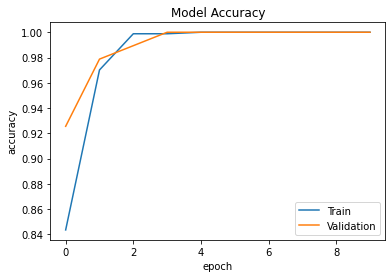

In [ ]:
# Model accuracy 
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'])
plt.show()

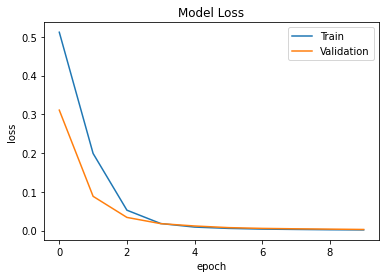

In [ ]:
# Model Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'])
plt.show()

In [ ]:
# Predictions
test=np.array(test_data)
predictions=(model.predict(test)>0.5).astype("int32")

res = pd.DataFrame(predictions) 
res.index = test_data.index
res.columns = ['prediction']
 
# To download the csv file locally
from google.colab import files
res.to_csv('prediction_results.csv', index=False)         
files.download('prediction_results.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>